# 데이터 경로 설정

In [1]:
import os 
os.environ['KAGGLE_USENAME'] = "bangeunho"
os.environ['KAGGLE_KEY'] = "01c3b064a27b67453aa91f6cf3b3622e"

In [2]:
!pip install kaggle

In [10]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download -d medharawat/google-stock-price

  0% 0.00/23.4k [00:00<?, ?B/s]
100% 23.4k/23.4k [00:00<00:00, 8.90MB/s]


In [14]:
!unzip /content/google-stock-price.zip

Archive:  /content/google-stock-price.zip
  inflating: Google_Stock_Price_Test.csv  
  inflating: Google_Stock_Price_Train.csv  


# 데이터 불러오기

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Google_Stock_Price_Train.csv')

In [16]:
print(df.tail())
print(len(df))

            Date    Open    High     Low   Close     Volume
1253  12/23/2016  790.90  792.74  787.28  789.91    623,400
1254  12/27/2016  790.68  797.86  787.66  791.55    789,100
1255  12/28/2016  793.70  794.23  783.20  785.05  1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79    744,300
1257  12/30/2016  782.75  782.78  770.41  771.82  1,770,000
1258


# 결측치 파악

## null 값 파악

In [17]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Date 제거

In [ ]:
df = df.drop(columns= ['Date'])

In [63]:
df

,Open,High,Low,Close,Volume
0,325.25,332.83,324.97,663.59,"7,380,500"
1,331.27,333.87,329.08,666.45,"5,749,400"
2,329.83,330.75,326.89,657.21,"6,590,300"
3,328.34,328.77,323.68,648.24,"5,405,900"
4,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
1253,790.90,792.74,787.28,789.91,"623,400"
1254,790.68,797.86,787.66,791.55,"789,100"
1255,793.70,794.23,783.20,785.05,"1,153,800"
1256,783.33,785.93,778.92,782.79,"744,300"


# 각 컬럼 분포 보기

Open


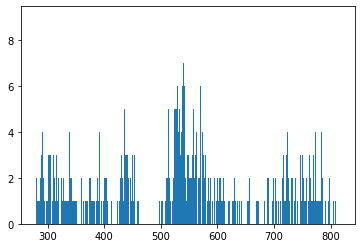

High


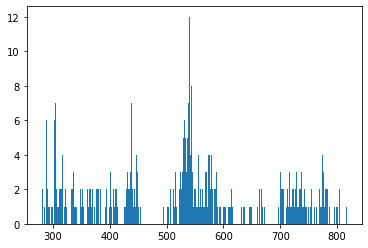

Low


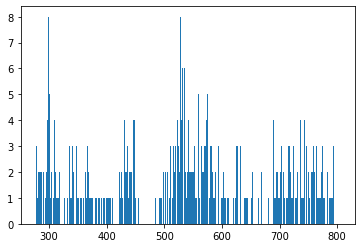

Close


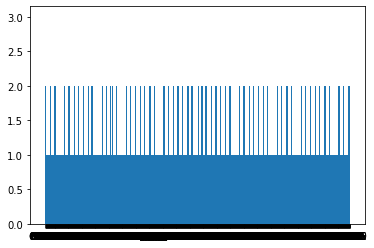

Volume


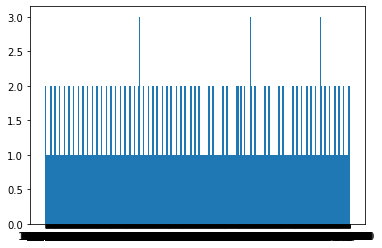

In [64]:
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=1000)
    plt.show()

In [18]:
raw_data = df.to_numpy()
print(raw_data.shape)

(1258, 6)


# 파라매터 설정

In [54]:
SEQUENCE_LENGTH = 30* 20
OFFSET = 30*20
BATCH_SIZE = 30
SAMPLING_COUNT = 1500 

# by Data Sampling

## 샘플링

In [55]:
raw_x = []
raw_y = []

for j in range(SAMPLING_COUNT):
  i = np.random.randint(len(numbers)-SEQUENCE_LENGTH-OFFSET)
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#                      y  = [8]   = 9



In [56]:
print(raw_x[0])
print(raw_y[0])
print()
print(raw_x[1])
print(raw_y[1])

[['3/9/2012' 302.84 304.81 298.88 '598.61' '5,361,100']
 ['3/12/2012' 298.88 302.37 298.51 '603.49' '3,350,400']
 ['3/13/2012' 303.24 307.77 301.64 '616.09' '4,508,300']
 ...
 ['7/25/2014' 588.78 590.24 585.42 '587.41' '932,400']
 ['7/28/2014' 586.46 590.88 583.15 '588.98' '986,800']
 ['7/29/2014' 587.14 588.09 581.92 '584.01' '1,349,800']]
['12/13/2016' 793.9 804.38 793.34 '796.1' '2,145,200']

[['1/10/2012' 313.7 315.72 307.3 '621.43' '8,824,000']
 ['1/11/2012' 310.59 313.52 309.4 '624.25' '4,817,800']
 ['1/12/2012' 314.43 315.26 312.08 '627.92' '3,764,400']
 ...
 ['5/28/2014' 563.02 566.29 559.46 '560.14' '1,652,000']
 ['5/29/2014' 561.81 562.46 557.18 '558.55' '1,354,100']
 ['5/30/2014' 559.26 559.81 554.39 '558.36' '1,771,100']]
['10/14/2016' 781.65 783.95 776.0 '778.53' '852,500']


In [57]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(1500, 600, 6)
(1500, 6)
Training Data:
(1350, 600, 6)
(1350, 6)
Test Data:
(150, 600, 6)
(150, 6)


train_x[0]
 [['2/27/2012' 302.16 305.04 301.4 '607.64' '3,641,300']
 ['2/28/2012' 303.86 308.73 302.71 '616.7' '5,716,400']
 ['2/29/2012' 308.14 311.63 306.6 '616.56' '6,297,200']
 ...
 ['7/14/2014' 581.0 583.61 576.45 '583.27' '1,854,000']
 ['7/15/2014' 584.14 584.2 574.98 '583.18' '1,623,000']
 ['7/16/2014' 586.39 586.79 580.61 '581.06' '1,397,100']]

train_y[0]
 ['11/30/2016' 770.07 772.99 754.83 '758.04' '2,392,900']


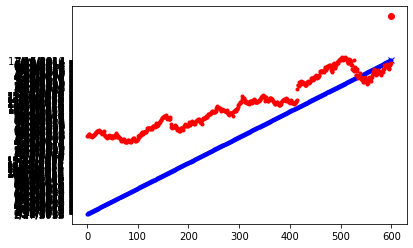

In [58]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.', color='blue')
plt.plot([len(train_x[0])], train_y[0,0], 'x', color='blue')
plt.plot(train_x[0].T[1], '.', color='red')
plt.plot([len(train_x[0])], train_y[0,1], 'o', color='red')

plt.show()